### Predict Credit Consumption of Customer For Leading Bank

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pf
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import minmax_scale ,StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10388\692035167.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pf


In [2]:
df1 = pd.read_excel("CreditConsumptionData.xlsx")
df2 = pd.read_excel("CustomerBehaviorData.xlsx")
df3 = pd.read_excel("CustomerDemographics.xlsx")

In [3]:
New_Data = pd.merge(left=df1,right=df2,how="left",on="ID")

In [4]:
final_dataframe = pd.merge(left=New_Data,right=df3,how="left",left_on="ID",right_on="ID")

In [5]:
final_dataframe.head()

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,12554,20014.0,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,...,1674.09,current,M,35,MEDIUM,15.0,1,708.0,0,17.0
1,17645,10173.0,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7,...,13043.34,current,M,35,HIGH,15.0,6,123.0,0,14.0
2,7604,16095.0,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,...,25375.27,current,M,55,MEDIUM,24.5,1,802.0,1,3.0
3,1590,7707.0,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,...,3544.33,current,F,29,MEDIUM,4.5,6,867.0,1,4.0
4,16556,96408.0,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,...,12780.44,current,M,34,MEDIUM,12.6,4,802.0,1,7.0


In [6]:
final_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   cc_cons                       15000 non-null  float64
 2   cc_cons_apr                   20000 non-null  float64
 3   dc_cons_apr                   20000 non-null  float64
 4   cc_cons_may                   19999 non-null  float64
 5   dc_cons_may                   20000 non-null  float64
 6   cc_cons_jun                   20000 non-null  float64
 7   dc_cons_jun                   19999 non-null  float64
 8   cc_count_apr                  19999 non-null  float64
 9   cc_count_may                  20000 non-null  int64  
 10  cc_count_jun                  20000 non-null  int64  
 11  dc_count_apr                  20000 non-null  int64  
 12  dc_count_may                  20000 non-null  int64  
 13  d

In [7]:
final_data = final_dataframe[-final_dataframe.cc_cons.isna()]

In [8]:
final_data

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,12554,20014.0,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,...,1674.09,current,M,35,MEDIUM,15.0,1,708.0,0,17.0
1,17645,10173.0,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7,...,13043.34,current,M,35,HIGH,15.0,6,123.0,0,14.0
2,7604,16095.0,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,...,25375.27,current,M,55,MEDIUM,24.5,1,802.0,1,3.0
3,1590,7707.0,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,...,3544.33,current,F,29,MEDIUM,4.5,6,867.0,1,4.0
4,16556,96408.0,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,...,12780.44,current,M,34,MEDIUM,12.6,4,802.0,1,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,6995,4263.0,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.0,36,...,78966.76,current,F,53,LOW,13.2,9,653.0,1,20.0
14996,10376,11019.0,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.0,34,...,4762.10,current,M,44,MEDIUM,2.4,9,535.0,1,2.0
14997,2181,404227.0,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.0,23,...,2877.33,current,M,37,MEDIUM,3.4,9,464.0,1,8.0
14998,18417,28813.0,115574.00,7191.05,44341.13,34817.20,20679.00,1010.00,7.0,128,...,13006.84,current,M,220,MEDIUM,40.0,10,536.0,1,3.0


In [9]:
final_test = final_dataframe[final_dataframe.cc_cons.isna()]

In [10]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            15000 non-null  int64  
 1   cc_cons                       15000 non-null  float64
 2   cc_cons_apr                   15000 non-null  float64
 3   dc_cons_apr                   15000 non-null  float64
 4   cc_cons_may                   15000 non-null  float64
 5   dc_cons_may                   15000 non-null  float64
 6   cc_cons_jun                   15000 non-null  float64
 7   dc_cons_jun                   15000 non-null  float64
 8   cc_count_apr                  14999 non-null  float64
 9   cc_count_may                  15000 non-null  int64  
 10  cc_count_jun                  15000 non-null  int64  
 11  dc_count_apr                  15000 non-null  int64  
 12  dc_count_may                  15000 non-null  int64  
 13  d

In [11]:
def missing_treat(x):
    if ((x.dtype=='float') or (x.dtype=='int')):
        x = x.fillna(x.median())
    elif x.dtype == 'object':
        x = x.fillna(x.mode()[0])
    else:
        x
    return(x)

In [12]:
final_data = final_data.apply(missing_treat)

In [13]:
def outlier_var(x):
    if ((x.dtype=='float') or (x.dtype=='int')):
        x= x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99))
    else:
        x
    return x

In [14]:
final_data = final_data.apply(outlier_var)

In [15]:
final_data = pd.get_dummies(final_data, columns = ['account_type', 'loan_enq',"gender"], drop_first=True)

In [16]:
final_data

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,emi_active,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,account_type_saving,gender_M
0,12554,20014.00,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,...,1674.09,35,MEDIUM,15.0,1,708.0,0,17.0,0,1
1,17645,10173.00,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7,...,13043.34,35,HIGH,15.0,6,233.0,0,14.0,0,1
2,7604,16095.00,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,...,25375.27,55,MEDIUM,24.5,1,802.0,1,3.0,0,1
3,1590,7707.00,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,...,3544.33,29,MEDIUM,4.5,6,867.0,1,4.0,0,0
4,16556,96408.00,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,...,12780.44,34,MEDIUM,12.6,4,802.0,1,7.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,6995,4263.00,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.0,36,...,78966.76,53,LOW,13.2,9,653.0,1,20.0,0,0
14996,10376,11019.00,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.0,34,...,4762.10,44,MEDIUM,2.4,9,535.0,1,2.0,0,1
14997,2181,395290.55,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.0,23,...,2877.33,37,MEDIUM,3.4,9,464.0,1,8.0,0,1
14998,18417,28813.00,115574.00,7191.05,44341.13,34817.20,20679.00,1010.00,7.0,128,...,13006.84,220,MEDIUM,40.0,10,536.0,1,3.0,0,1


In [17]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [18]:
final_data["income"]=encode.fit_transform(final_data["Income"])

In [19]:
final_data

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,account_type_saving,gender_M,income
0,12554,20014.00,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,...,35,MEDIUM,15.0,1,708.0,0,17.0,0,1,2
1,17645,10173.00,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7,...,35,HIGH,15.0,6,233.0,0,14.0,0,1,0
2,7604,16095.00,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,...,55,MEDIUM,24.5,1,802.0,1,3.0,0,1,2
3,1590,7707.00,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,...,29,MEDIUM,4.5,6,867.0,1,4.0,0,0,2
4,16556,96408.00,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,...,34,MEDIUM,12.6,4,802.0,1,7.0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,6995,4263.00,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.0,36,...,53,LOW,13.2,9,653.0,1,20.0,0,0,1
14996,10376,11019.00,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.0,34,...,44,MEDIUM,2.4,9,535.0,1,2.0,0,1,2
14997,2181,395290.55,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.0,23,...,37,MEDIUM,3.4,9,464.0,1,8.0,0,1,2
14998,18417,28813.00,115574.00,7191.05,44341.13,34817.20,20679.00,1010.00,7.0,128,...,220,MEDIUM,40.0,10,536.0,1,3.0,0,1,2


In [20]:
final_data = final_data.drop(columns=["Income"])

In [21]:
final_data

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,emi_active,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,account_type_saving,gender_M,income
0,12554,20014.00,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,...,1674.09,35,15.0,1,708.0,0,17.0,0,1,2
1,17645,10173.00,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7,...,13043.34,35,15.0,6,233.0,0,14.0,0,1,0
2,7604,16095.00,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,...,25375.27,55,24.5,1,802.0,1,3.0,0,1,2
3,1590,7707.00,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,...,3544.33,29,4.5,6,867.0,1,4.0,0,0,2
4,16556,96408.00,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,...,12780.44,34,12.6,4,802.0,1,7.0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,6995,4263.00,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.0,36,...,78966.76,53,13.2,9,653.0,1,20.0,0,0,1
14996,10376,11019.00,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.0,34,...,4762.10,44,2.4,9,535.0,1,2.0,0,1,2
14997,2181,395290.55,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.0,23,...,2877.33,37,3.4,9,464.0,1,8.0,0,1,2
14998,18417,28813.00,115574.00,7191.05,44341.13,34817.20,20679.00,1010.00,7.0,128,...,13006.84,220,40.0,10,536.0,1,3.0,0,1,2


In [22]:
x = final_data.drop(columns=["cc_cons"])
y = final_data["cc_cons"]

In [23]:
y

0         20014.00
1         10173.00
2         16095.00
3          7707.00
4         96408.00
           ...    
14995      4263.00
14996     11019.00
14997    395290.55
14998     28813.00
14999     16252.00
Name: cc_cons, Length: 15000, dtype: float64

In [24]:
x.head()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,emi_active,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,account_type_saving,gender_M,income
0,12554,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,10,...,1674.09,35,15.0,1,708.0,0,17.0,0,1,2
1,17645,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7,13,...,13043.34,35,15.0,6,233.0,0,14.0,0,1,0
2,7604,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,102,...,25375.27,55,24.5,1,802.0,1,3.0,0,1,2
3,1590,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,50,...,3544.33,29,4.5,6,867.0,1,4.0,0,0,2
4,16556,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,82,...,12780.44,34,12.6,4,802.0,1,7.0,0,1,2


In [25]:
#Transforming X variables
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [26]:
trans_x = pd.DataFrame(data_trans,columns=x.columns,index=x.index)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10388\3928149190.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trans_x.dc_cons_apr)


<AxesSubplot: xlabel='dc_cons_apr', ylabel='Density'>

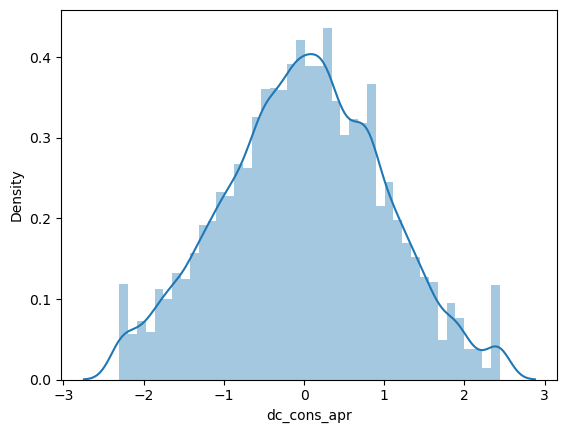

In [27]:
sns.distplot(trans_x.dc_cons_apr)

In [28]:
#Transforming Y variables
trans_y = np.log(y)

In [29]:
from sklearn.feature_selection import SelectKBest, f_regression

In [30]:
SKB = SelectKBest(f_regression,k=8).fit(trans_x,trans_y)
trans_x.columns[SKB.get_support()].values

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms


array(['cc_cons_may', 'cc_count_may', 'investment_3', 'credit_amount_apr',
       'debit_count_apr', 'max_credit_amount_jun', 'Emp_Tenure_Years',
       'Avg_days_between_transaction'], dtype=object)

In [31]:
trans_xx=trans_x[['cc_cons_may', 'cc_count_may', 'investment_3', 'credit_amount_apr',
       'debit_count_apr', 'max_credit_amount_jun', 'Emp_Tenure_Years',
       'Avg_days_between_transaction']]

In [32]:
train_X, test_X, train_y, test_y = train_test_split(trans_xx, trans_y, test_size=0.2, random_state=1234)

In [42]:
std = StandardScaler()
train_X_std = std.fit_transform(train_X)

In [44]:
train_X_std = pd.DataFrame(train_X_std,columns = train_X.columns)

In [45]:
train_X_std

,cc_cons_may,cc_count_may,investment_3,credit_amount_apr,debit_count_apr,max_credit_amount_jun,Emp_Tenure_Years,Avg_days_between_transaction
0,-0.182359,-0.211180,0.535476,0.684844,-0.375478,0.199424,1.445482,1.227106
1,0.402190,-1.381343,1.348303,0.318957,0.590567,-0.210062,-0.234357,1.539178
2,0.787388,-0.710111,0.035062,2.209329,-1.618010,-0.083406,0.933677,0.906351
3,0.859387,-0.538285,-0.470584,-0.851125,0.735165,-0.480012,-1.076658,-0.307897
4,-1.780691,-1.200274,0.612896,-0.147987,0.950613,1.387804,-1.048322,0.906351
...,...,...,...,...,...,...,...,...
11995,-0.686741,0.551209,-0.162361,-0.932950,0.512934,0.287970,-0.206920,1.227106
11996,1.067200,0.499332,-1.494863,0.202279,0.590567,-0.659304,1.184802,1.067888
11997,1.328938,0.386709,0.798474,0.078790,1.393324,0.148520,2.660567,-0.893654
11998,-0.220236,0.356438,0.453567,0.141660,0.640252,1.282004,1.422238,0.405959


In [46]:
test_X_std =  pd.DataFrame(std.fit_transform(test_X), columns = test_X.columns)

In [47]:
test_X_std

,cc_cons_may,cc_count_may,investment_3,credit_amount_apr,debit_count_apr,max_credit_amount_jun,Emp_Tenure_Years,Avg_days_between_transaction
0,-1.181359,-0.260163,1.051737,0.494736,-0.811201,-2.391282,-2.264854,1.041854
1,0.617134,-0.050781,1.570698,-0.236551,-0.885766,-0.233771,0.823500,-0.306771
2,0.018726,-1.041046,0.281241,1.033488,-0.390595,-0.860170,1.050685,-1.525594
3,0.528200,-0.701425,-1.569608,-0.616959,1.107261,-0.375522,0.812198,0.883506
4,1.016637,0.698820,0.827506,0.649001,-0.811201,-0.219018,-0.190073,-0.125900
...,...,...,...,...,...,...,...,...
2995,-1.081687,-1.041046,-1.061150,-0.772129,2.171077,-0.340414,0.145230,1.503840
2996,-0.830612,-1.371537,1.206921,-0.490471,1.107261,0.736207,-0.507825,1.503840
2997,0.938483,0.120895,-0.876866,2.931590,-1.495168,-0.055456,-1.307813,-0.492418
2998,1.049544,-0.098965,0.623658,0.308718,1.069536,-0.497523,0.145230,-1.085911


In [48]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,70,80,90,100,110,120,130,138,139,140,141,142,143,150], 'weights': ['uniform', 'distance']}  
knn_clf_grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, n_jobs =-1, verbose=True)

In [50]:
knn_clf_grid

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 24,
                                         25, 26, 27, 28, 29, 30, 31, 32, ...],
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [51]:
knn_clf_grid.fit(train_X_std,train_y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 24,
                                         25, 26, 27, 28, 29, 30, 31, 32, ...],
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [52]:
knn_clf_grid.best_params_

{'n_neighbors': 142, 'weights': 'uniform'}

In [53]:
knn_reg = KNeighborsRegressor(n_neighbors=142, weights='uniform', n_jobs=-1)
knn_reg = knn_reg.fit(train_X_std, train_y)

In [54]:
train_pred = knn_reg.predict(train_X)

In [55]:
train_pred

array([9.56964107, 9.75288167, 9.48559328, ..., 9.73163913, 9.56501069,
       9.69268554])

In [56]:
test_pred = knn_reg.predict(test_X)

In [57]:
test_pred

array([9.41393185, 9.77438118, 9.57973284, ..., 9.8635116 , 9.55842297,
       9.54524027])

In [58]:
metrics.mean_absolute_percentage_error(train_y,train_pred)

0.12401709756226117

In [59]:
metrics.mean_absolute_percentage_error(test_y, test_pred)

0.11989768388094114

In [60]:
metrics.mean_squared_error(train_y,train_pred)

2.505287748474739

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

In [64]:
estimate = LinearRegression()

In [65]:
rfecv1=RFECV(estimator=estimate,step=1,min_features_to_select=8,scoring="neg_mean_squared_error",cv=5,verbose=True,n_jobs=-1)

In [66]:
rfecv1

RFECV(cv=5, estimator=LinearRegression(), min_features_to_select=8, n_jobs=-1,
      scoring='neg_mean_squared_error', verbose=True)

In [67]:
recurve = rfecv1.fit(trans_x,trans_y)

Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 fe

In [68]:
rfecv1.support_

array([False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False,  True, False,
       False, False])

In [69]:
trans_x.columns[recurve.get_support()].values

array(['cc_cons_may', 'cc_count_may', 'investment_3', 'credit_amount_apr',
       'debit_count_apr', 'max_credit_amount_jun', 'Emp_Tenure_Years',
       'Avg_days_between_transaction'], dtype=object)

In [70]:
trans_x2 = trans_x[['cc_cons_may', 'dc_cons_jun', 'cc_count_may', 'investment_3',
       'credit_amount_apr', 'max_credit_amount_jun', 'Emp_Tenure_Years',
       'Avg_days_between_transaction']]

In [71]:
train_X, test_X, train_y, test_y = train_test_split(trans_x2, trans_y, test_size=0.2, random_state=1234)

In [72]:
linear_reg = LinearRegression(n_jobs = -1)
linear_reg.fit(train_X,train_y)

LinearRegression(n_jobs=-1)

In [73]:
train_pred = linear_reg.predict(train_X)

In [74]:
train_pred

array([9.60975006, 9.55599835, 9.66975075, ..., 9.64279014, 9.6478686 ,
       9.63610108])

In [75]:
test_pred = linear_reg.predict(test_X)

In [76]:
test_pred

array([9.58509311, 9.60146887, 9.66566854, ..., 9.82373472, 9.67853128,
       9.51057426])

In [77]:
metrics.mean_absolute_percentage_error(train_y,train_pred)

0.12422524833545891

In [78]:
metrics.mean_absolute_percentage_error(test_y, test_pred)

0.11919137821828323

In [79]:
from xgboost import XGBRegressor

In [80]:
final_test.drop(columns=["cc_cons"],inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10388\1993726805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_test.drop(columns=["cc_cons"],inplace=True)


In [81]:
final_test

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
15000,17591,2795.450,1290.00,6141.05,676.50,9146.10,15479.00,4.0,10,4,...,1170.49,current,M,37,MEDIUM,11.9,4,575.0,1,16.0
15001,13541,29405.130,1640.00,1670.00,2463.92,10947.50,956.00,3.0,10,4,...,16447.45,current,M,33,MEDIUM,7.8,6,394.0,0,19.0
15002,13431,5985.200,6189.00,2696.09,766.00,716.00,4133.22,7.0,30,5,...,2622.28,current,M,53,LOW,33.0,10,324.0,1,15.0
15003,8687,2105.930,18225.00,34763.56,167.00,4260.27,20185.00,1.0,99,71,...,340.79,current,M,33,MEDIUM,7.8,5,370.0,1,7.0
15004,14727,3269.000,3532.00,3158.40,2699.77,3373.48,5120.00,2.0,10,47,...,2812.20,current,M,62,LOW,12.6,9,505.0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,...,7870.88,current,M,35,MEDIUM,13.5,1,523.0,0,7.0
19996,14224,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,...,3668.30,current,M,53,MEDIUM,9.9,7,723.0,1,2.0
19997,18740,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,...,5450.34,current,M,62,HIGH,37.8,8,863.0,1,16.0
19998,18134,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,...,59.29,current,M,34,MEDIUM,12.6,4,882.0,0,13.0


In [82]:
def missing_treat(x):
    if ((x.dtype=='float') or (x.dtype=='int')):
        x = x.fillna(x.median())
    elif x.dtype == 'object':
        x = x.fillna(x.mode()[0])
    else:
        x
    return(x)

In [83]:
final_test = final_test.apply(missing_treat)

In [84]:
def outlier_var(x):
    if ((x.dtype=='float') or (x.dtype=='int')):
        x= x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99))
    else:
        x
    return x

In [85]:
final_test = final_test.apply(outlier_var)

In [86]:
final_test = pd.get_dummies(final_test, columns = ['account_type', 'loan_enq',"gender"], drop_first=True)

In [87]:
final_test["income"]=encode.fit_transform(final_test["Income"])
final_test=final_test.drop(columns=["Income"])

In [88]:
final_test

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,emi_active,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,account_type_saving,gender_M,income
15000,17591,2795.450,1290.00,6141.05,676.50,9146.10,15479.00,4.0,10,4,...,1170.49,37,11.9,4,575.0,1,16.0,0,1,2
15001,13541,29405.130,1640.00,1670.00,2463.92,10947.50,956.00,3.0,10,4,...,16447.45,33,7.8,6,394.0,0,19.0,0,1,2
15002,13431,5985.200,6189.00,2696.09,766.00,716.00,4133.22,7.0,30,5,...,2622.28,53,33.0,10,324.0,1,15.0,0,1,1
15003,8687,2105.930,18225.00,34763.56,167.00,4260.27,20185.00,1.0,99,71,...,340.79,33,7.8,5,370.0,1,7.0,0,1,2
15004,14727,3269.000,3532.00,3158.40,2699.77,3373.48,5120.00,2.0,10,47,...,2812.20,62,12.6,9,505.0,1,3.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,...,7870.88,35,13.5,1,523.0,0,7.0,0,1,2
19996,14224,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,...,3668.30,53,9.9,7,723.0,1,2.0,0,1,2
19997,18740,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,...,5450.34,62,37.8,8,863.0,1,16.0,0,1,0
19998,18134,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,...,59.29,34,12.6,4,882.0,0,13.0,0,1,2


In [89]:
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(final_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [90]:
trans_test_x = pd.DataFrame(data_trans,columns=final_test.columns,index=final_test.index)

In [91]:
trans_test_x

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,emi_active,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,account_type_saving,gender_M,income
15000,1.229686,-1.040391,-0.825202,-0.246000,-1.320002,0.295500,1.266498,-0.827580,-0.506429,-1.428118,...,-0.755838,-0.271354,0.230765,-0.437285,-0.099204,0.633828,0.911639,-0.43676,0.388945,0.751751
15001,0.662437,1.003451,-0.648354,-1.329421,-0.317317,0.455627,-0.974067,-1.049922,-0.506429,-1.428118,...,1.043420,-0.732577,-0.226930,0.253356,-0.938376,-1.577715,1.395672,-0.43676,0.388945,0.751751
15002,0.646362,-0.409286,0.380943,-0.936135,-1.225675,-1.797153,0.215099,-0.389881,0.400636,-1.309372,...,-0.248647,0.813997,1.330755,1.479405,-1.272764,0.633828,0.745778,-0.43676,0.388945,-1.148547
15003,-0.092313,-1.268184,1.285030,1.267703,-2.351746,-0.366067,1.475453,-1.805940,1.492468,0.949666,...,-1.467251,-0.732577,-0.226930,-0.083358,-1.052286,0.633828,-0.696559,-0.43676,0.388945,0.751751
15004,0.833323,-0.912920,-0.064502,-0.804855,-0.244601,-0.562200,0.386939,-1.351291,-0.506429,0.483714,...,-0.203026,1.153685,0.292925,1.187537,-0.420013,0.633828,-1.550496,-0.43676,0.388945,-1.148547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.510450,-0.623153,0.353142,-0.264512,0.149878,1.703393,-0.420008,0.572389,-1.887263,-1.428118,...,0.500626,-0.487187,0.367958,-1.666720,-0.337112,-1.577715,-0.696559,-0.43676,0.388945,0.751751
19996,0.761379,-0.561827,-0.242827,0.907644,0.383017,-1.509481,-0.930030,0.803976,0.959350,0.550543,...,-0.027147,0.813997,0.030863,0.576003,0.566663,0.633828,-1.792794,-0.43676,0.388945,0.751751
19997,1.383072,-0.914638,-0.225042,-0.094640,0.960581,-0.392324,-0.654330,0.021876,1.254721,-1.952447,...,0.242327,1.153685,1.474267,0.886836,1.183809,0.633828,0.911639,-0.43676,0.388945,-1.797233
19998,1.302542,0.250826,0.187987,0.346472,-1.966749,0.748360,1.968382,1.164338,-1.887263,-1.428118,...,-2.351897,-0.605837,0.292925,-0.437285,1.266745,-1.577715,0.406198,-0.43676,0.388945,0.751751


In [92]:
trans_test_x = trans_test_x[['cc_cons_may', 'cc_count_may', 'investment_3', 'credit_amount_apr',
       'debit_count_apr', 'max_credit_amount_jun', 'Emp_Tenure_Years',
       'Avg_days_between_transaction']]

In [93]:
trans_test_x

,cc_cons_may,cc_count_may,investment_3,credit_amount_apr,debit_count_apr,max_credit_amount_jun,Emp_Tenure_Years,Avg_days_between_transaction
15000,-0.246000,-0.506429,-1.042603,-0.098022,-0.461833,-0.215344,0.230765,0.911639
15001,-1.329421,-0.506429,-1.358027,-0.727802,0.509463,-0.818003,-0.226930,1.395672
15002,-0.936135,0.400636,0.852588,-0.277801,0.482198,-0.760612,1.330755,0.745778
15003,1.267703,1.492468,-0.361123,-0.123479,0.613865,0.830125,-0.226930,-0.696559
15004,-0.804855,-0.506429,1.346999,-1.023198,-0.776317,0.248049,0.292925,-1.550496
...,...,...,...,...,...,...,...,...
19995,-0.264512,-1.887263,-1.650235,-0.252150,-1.216118,0.580613,0.367958,-0.696559
19996,0.907644,0.959350,-0.062526,-2.454701,0.211071,-0.279614,0.030863,-1.792794
19997,-0.094640,1.254721,0.524569,0.499635,0.211071,-1.901552,1.474267,0.911639
19998,0.346472,-1.887263,-1.338637,0.297929,0.454428,0.120902,0.292925,0.406198


In [94]:
train_X, test_X, train_y, test_y = train_test_split(trans_xx, trans_y, test_size = 0.3, random_state = 1234)


In [95]:
xg_boost = XGBRegressor(random_state = 123)
xg_boost.fit(train_X, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=123, ...)

In [96]:
pred_train = xg_boost.predict(train_X)

In [97]:
pred_test = xg_boost.predict(test_X)

In [98]:
metrics.mean_absolute_percentage_error(train_y,pred_train)

0.08108766673410034

In [99]:
metrics.mean_absolute_percentage_error(test_y,pred_test)

0.13474584625316116

In [100]:
#Predict on Test Data
pred = xg_boost.predict(trans_test_x)

In [101]:
pred_y = pd.DataFrame(pred)

In [103]:
y_pred = np.exp(pred_y)
y_pred.columns = ['cc_cons']
y_pred.index = final_test.index
y_pred["ID"] = final_test.ID

In [104]:
y_pred

,cc_cons,ID
15000,23127.939453,17591
15001,13323.985352,13541
15002,33920.800781,13431
15003,19129.005859,8687
15004,11283.713867,14727
...,...,...
19995,35580.574219,12512
19996,19189.285156,14224
19997,13458.923828,18740
19998,7153.122070,18134
